**A1. Use numpy.fft.fft() to transform the speech signal to its spectral domain.** **Please plot the**
**amplitude part of the spectral components and observe it.**

In [2]:
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt
import librosa

signal, sr = librosa.load("statement.mp3")

fft_data = np.fft.fft(signal)
amplitude = np.abs(fft_data)

frequencies = np.fft.fftfreq(len(signal), d=1/sr)

print("FFT DATA:\n",fft_data)
print("Amplitude:\n",amplitude)
print("Frequencies:\n",frequencies)


FFT DATA:
 [-0.66235612-1.68753900e-14j -0.14285579+7.08604168e-01j
  0.76864741+6.43133007e-01j ...  0.90204506+2.39415146e-01j
  0.76864741-6.43133007e-01j -0.14285579-7.08604168e-01j]
Amplitude:
 [0.66235612 0.72286074 1.002217   ... 0.93327643 1.002217   0.72286074]
Frequencies:
 [ 0.          0.3633697   0.7267394  ... -1.09010909 -0.7267394
 -0.3633697 ]


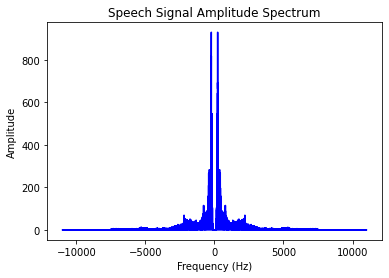

In [3]:

plt.plot(frequencies, amplitude,color = "blue")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.title("Speech Signal Amplitude Spectrum")
plt.show()

**A2. Use numpy.fft.ifft() to inverse transform the frequency spectrum of the**  **speech signal from frequency domain to time domain. Compare the generated** **time domain signal with the original signal.**

In [4]:
time_domain = np.fft.ifft(fft_data)
time_domain = time_domain[:len(signal)]


C:\Users\91939\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


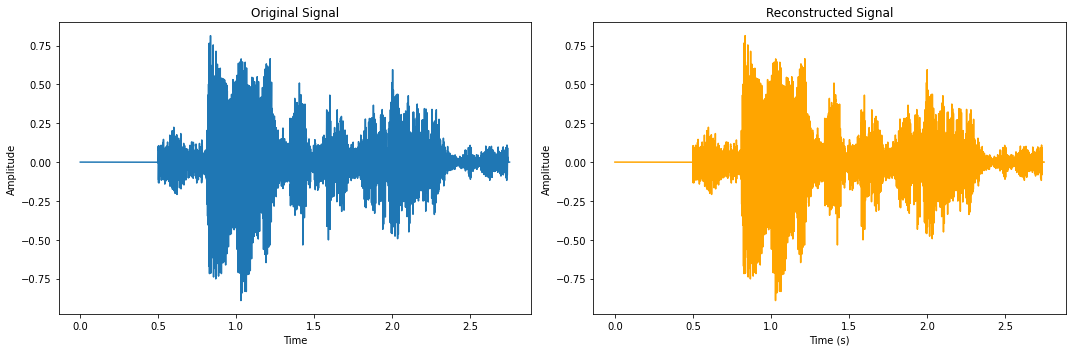

In [5]:
time = np.linspace(0, len(signal)/sr, len(signal))
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(time,signal)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Original Signal")

plt.subplot(1, 2, 2)
plt.plot(time, time_domain,color = "orange")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Reconstructed Signal")

plt.tight_layout()
plt.show()

**A3. Perform the spectral analysis of a word present in the recorded speech.** **Compare the spectrum with the spectrum of the full signal.**

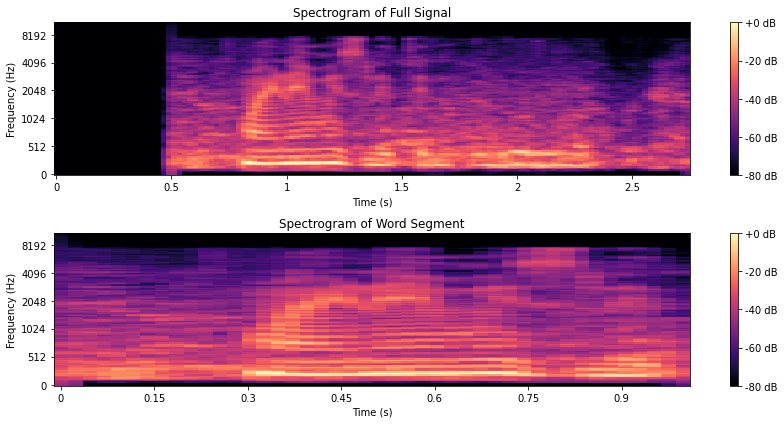

In [6]:
path = 'statement.mp3'
full_signal, sr = librosa.load(path)

word_start_time = 0.5 
word_end_time = 1.5

start_sample = librosa.time_to_samples(word_start_time, sr=sr)
end_sample = librosa.time_to_samples(word_end_time, sr=sr)

word_segment = full_signal[start_sample:end_sample]

full_spec = librosa.feature.melspectrogram(y=full_signal, sr=sr)
word_spec = librosa.feature.melspectrogram(y=word_segment, sr=sr)

full_spec_db = librosa.power_to_db(full_spec, ref=np.max)
word_spec_db = librosa.power_to_db(word_spec, ref=np.max)

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
librosa.display.specshow(full_spec_db, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram of Full Signal')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')

plt.subplot(2, 1, 2)
librosa.display.specshow(word_spec_db, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram of Word Segment')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')

plt.tight_layout()
plt.show()


**A4. Take a rectangular window of 20 mili-second sampled at 22.5 KHz. Using FFT, analyse the spectral components.**

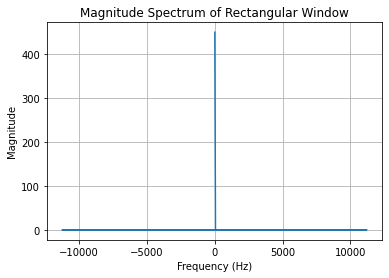

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters
sampling_rate = 22500  # Sampling rate in Hz
window_duration = 0.02  # Window duration in seconds

# Generate the rectangular window
window_length = int(window_duration * sampling_rate)
rectangular_window = np.ones(window_length)

# Compute the FFT
fft_result = np.fft.fft(rectangular_window)

# Calculate the frequency axis
frequency_axis = np.fft.fftfreq(window_length, 1 / sampling_rate)

# Plot the magnitude spectrum
plt.plot(frequency_axis, np.abs(fft_result))
plt.title('Magnitude Spectrum of Rectangular Window')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()


**Break your speech signal into window lengths of 20 mSec intervals. Evaluate the frequency components using numpy.fft.rfft(). Stack these frequency components as columns in a matrix. Use heatmap plot to display the matrix. You may use librosa.stft() or scipy.signal.stft() as well to achieve this.**


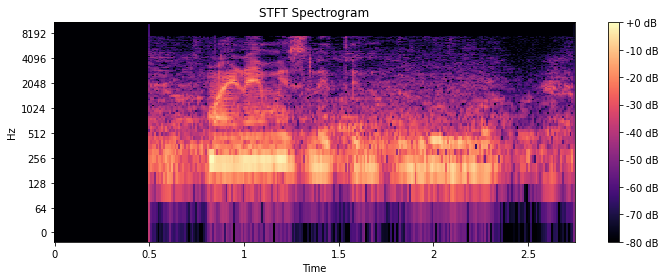

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import librosa.display

file_path = "statement.mp3"
y, sr = librosa.load(file_path)

window_length = int(0.02 * sr)
hop_length = int(0.01 * sr)
D = librosa.stft(y, n_fft=window_length, hop_length=hop_length)
D_amplitude = np.abs(D)

plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.amplitude_to_db(D_amplitude, ref=np.max), sr=sr, hop_length=hop_length, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('STFT Spectrogram')
plt.tight_layout()
plt.show()


**A6. Use scipy.signal.spectrogram() to plot the spectrogram of the speech signal at the same duration. Compare the plots.**

C:\Users\91939\AppData\Local\Temp\ipykernel_13592\20109610.py:15: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(times, frequencies, 10 * np.log10(spec_scipy), shading='gouraud')


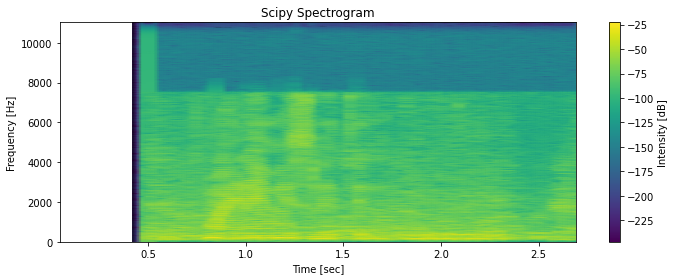

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram
import librosa
import librosa.display

# Load the speech signal using librosa
file_path = "statement.mp3"  # Change this to your file path
y, sr = librosa.load(file_path)

# Compute the spectrogram using scipy
frequencies, times, spec_scipy = spectrogram(y, fs=sr, nperseg=2048, noverlap=1536)

plt.figure(figsize=(10, 4))
plt.pcolormesh(times, frequencies, 10 * np.log10(spec_scipy), shading='gouraud')
plt.title('Scipy Spectrogram')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.colorbar(label='Intensity [dB]')
plt.tight_layout()
plt.show()
